# Automatic Image Segmentation techniques 
The objective of this kernel is only showing general non-interactive appproaches used in image segmentation. In the given image we attempt to label the road from the others(background).  This is just a curiosity to know which approach would work well.

## 1. Gray-level region based segmentation 
Images will be segmented at gray-scale level. The separation can be applied upon some pre-defined thresholds.  


In [13]:
import numpy as np
import scipy.ndimage as nd # Filters Convolutiom
import cv2   # Image manipulation
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
plt.rcParams['figure.figsize'] = (14, 12)

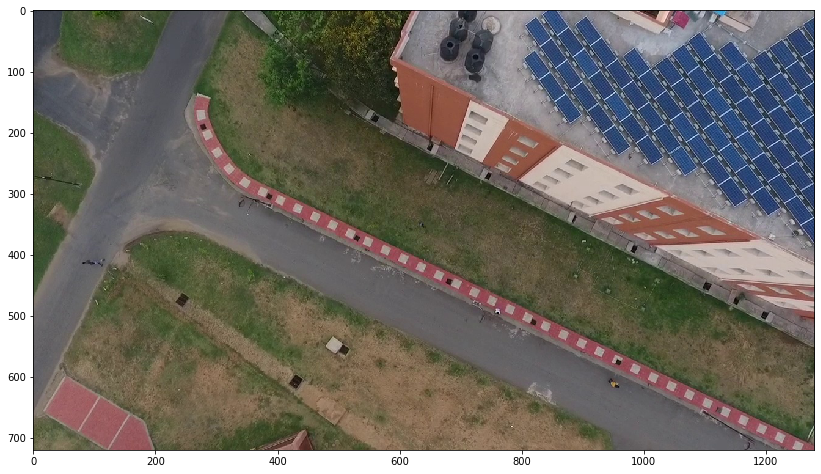

In [14]:
img_src = plt.imread("../img-clip-1of2/frame180.jpg")
plt.imshow(img_src)

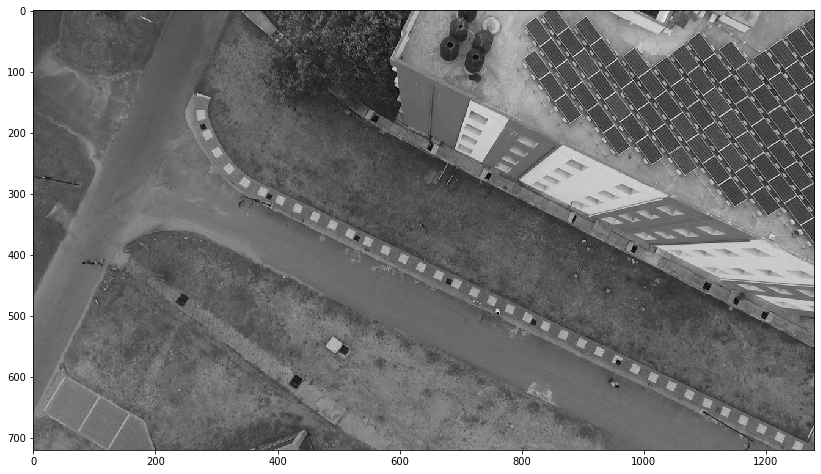

In [15]:
img_src_gray = rgb2gray(img_src)
plt.imshow(img_src_gray, cmap='gray')

In [17]:
img_src_gray = img_src_gray.reshape(img_src.shape[0] * img_src.shape[1])

## Assumption 
We make an assumption that pixel values in background will be less than the mean of the grayscaled image and respectively greater for the foreground. 

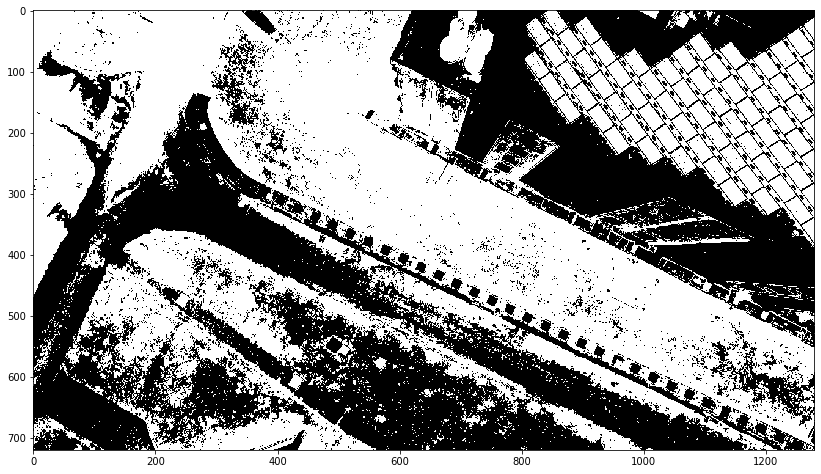

In [18]:
img_src_seg = np.where(img_src_gray > np.mean(img_src_gray), 0, 1)
img_src_seg = img_src_seg.reshape(img_src.shape[0], img_src.shape[1])
plt.imshow(img_src_seg, cmap='gray')

## 2. Edge-detection based segmentation 
In the following, we are using 2 different filters for vertical and horizontal edge-detection. These filters are respectively `Sobel` and  `Laplacian`. <br>
Sobel filter horizontal: 
$
\begin{pmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{pmatrix}
$
<br>
<br>
Sobel filter vertical: 
$
\begin{pmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{pmatrix}
$
<br>
<br>
Laplacian filter:
$
\begin{pmatrix} 1 & 1 & 1 \\ 1 & -8 & 1 \\ 1 & 1 & 1 \end{pmatrix}
$



In [46]:
# Define Sobel filter to the grayscaled image
sb_hz_filter = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
sb_vt_filter = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
lp_filter = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])

In [49]:
# Convolve filter one by one 
img_src_gray = img_src_gray.reshape(img_src.shape[0], img_src.shape[1])

# Sobel Horizintal filter 
sb_hz_conv = nd.convolve(img_src_gray, sb_hz_filter, mode='reflect')
# Sobel Vertical filter 
sb_vt_conv = nd.convolve(img_src_gray, sb_vt_filter, mode='reflect')
# Laplacian filter 
lp_conv = nd.convolve(img_src_gray, lp_filter, mode='reflect')

### After convolving image to `sobel horizontal` filter 

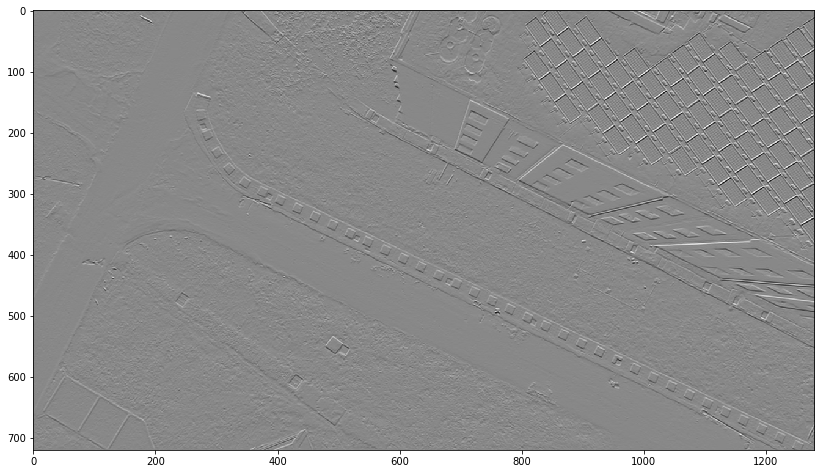

In [43]:
plt.imshow(sb_hz_conv, cmap='gray')

### After convolving image to `sobel vertical` filter 

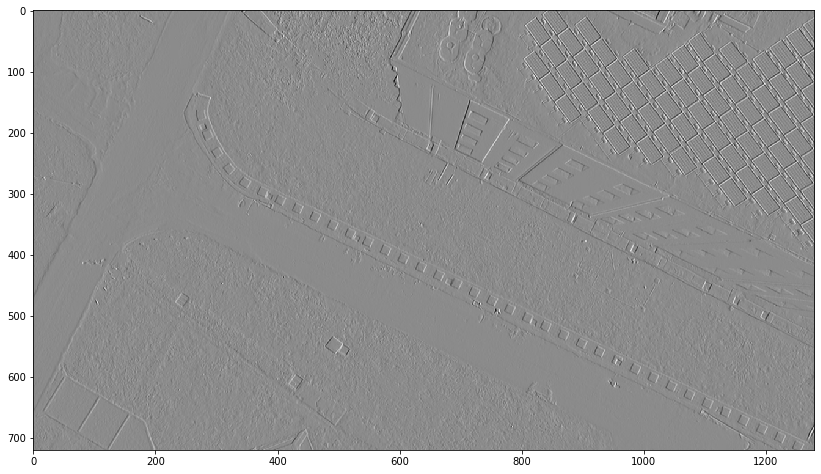

In [44]:
plt.imshow(sb_vt_conv, cmap='gray')

### After convolving image to `laplacian` filter 

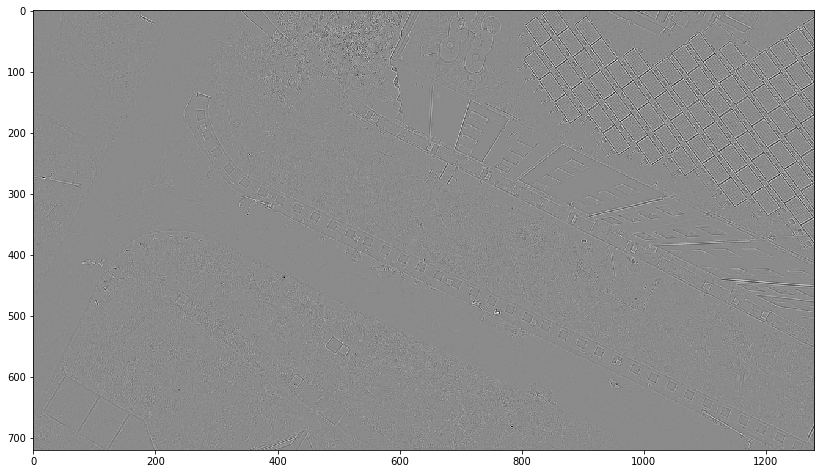

In [50]:
plt.imshow(lp_conv, cmap='gray')

## 3. Clustering based image segmentation 

### K-Means clustering 

In [38]:
img_src_kmean = img_src.reshape(img_src.shape[0]*img_src.shape[1], img_src.shape[2])

from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=0).fit(img_src_kmean)
img_kmean_labeled = model.cluster_centers_[model.labels_]


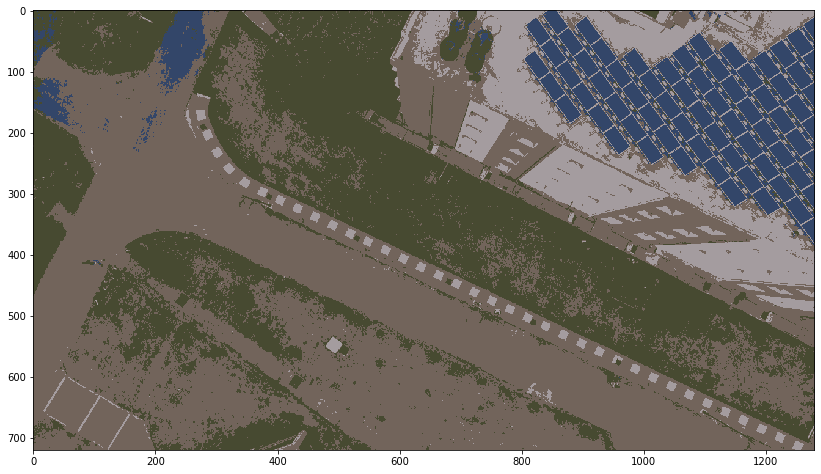

In [39]:
img_cluster = img_kmean_labeled.reshape(img_src.shape[0], img_src.shape[1], img_src.shape[2])
#img_cluster
plt.imshow(img_cluster.astype('uint8'))